In [1]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import img_as_float, img_as_ubyte
from skimage import io
from scipy import ndimage as nd
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage.color import rgb2gray
from numpy import ones
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage import io
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.restoration import denoise_nl_means
from skimage.restoration import estimate_sigma
from skimage.morphology import binary_opening, binary_closing
from skimage.util import img_as_ubyte

import numpy as np
from skimage.filters import threshold_otsu
import glob
import csv
from scipy.stats import linregress
import pandas as pd
import cv2
import numpy as np
from skimage.filters.rank import entropy
from skimage.morphology import disk

In [2]:
def global_entropy(image):
    hist, _ = np.histogram(image, bins=np.arange(256), density=True)
    hist = hist[hist > 0]
    return -np.sum(hist * np.log2(hist))

def local_entropy(image, neighborhood):
    return entropy(image, neighborhood)

def entropy_threshold(image, neighborhood):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    h, w = gray_image.shape
    total_entropy = global_entropy(gray_image)
    max_info_gain = 0
    best_threshold = 0

    entropy_img = local_entropy(gray_image, neighborhood)

    for threshold in range(1, 255):
        foreground = gray_image[gray_image <= threshold]
        background = gray_image[gray_image > threshold]

        if len(foreground) == 0 or len(background) == 0:
            continue

        p_foreground = len(foreground) / (h * w)
        p_background = len(background) / (h * w)

        foreground_entropy_mean = entropy_img[gray_image >= threshold].mean()
        background_entropy_mean = entropy_img[gray_image < threshold].mean()

        info_gain = total_entropy - (p_foreground * foreground_entropy_mean +
                                     p_background * background_entropy_mean)

        if info_gain > max_info_gain:
            max_info_gain = info_gain
            best_threshold = threshold

    _, binary_image = cv2.threshold(gray_image, best_threshold, 255, cv2.THRESH_BINARY)

    return binary_image


uint8


<function matplotlib.pyplot.show(close=None, block=None)>

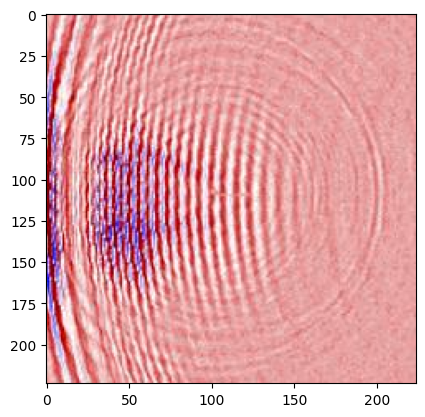

In [3]:
img = cv2.imread("ng1.jpg")
plt.imshow(img)
print(img.dtype)
plt.show

In [4]:
neighborhood = disk(22)

In [5]:

thresholded_image = entropy_threshold(img, neighborhood)
scratch_area = np.sum(thresholded_image == 255)



C:\Users\R\AppData\Local\Temp\ipykernel_196\2256165501.py:29: RuntimeWarning: Mean of empty slice.
  background_entropy_mean = entropy_img[gray_image < threshold].mean()
C:\Users\R\anaconda3\envs\tn\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


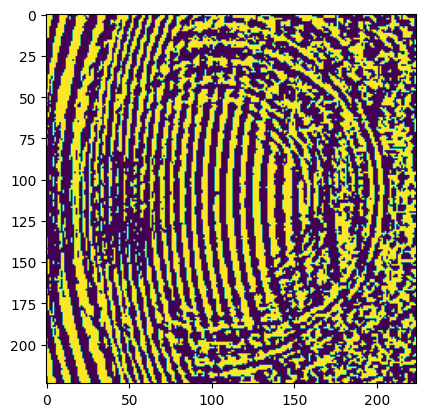

In [6]:
plt.imshow(thresholded_image)
plt.show()

In [7]:
gray_image = cv2.cvtColor(thresholded_image, cv2.COLOR_GRAY2BGR)
sigma_est = np.mean(estimate_sigma(gray_image))
nlm = denoise_nl_means(gray_image, h=1.15 * sigma_est, fast_mode=True, patch_size=3, patch_distance=3)
nlmu = img_as_ubyte(nlm)


C:\Users\R\AppData\Local\Temp\ipykernel_196\2658552383.py:2: UserWarning: image is size 3 on the last axis, but channel_axis is None. If this is a color image, please set channel_axis=-1 for proper noise estimation.
  sigma_est = np.mean(estimate_sigma(gray_image))


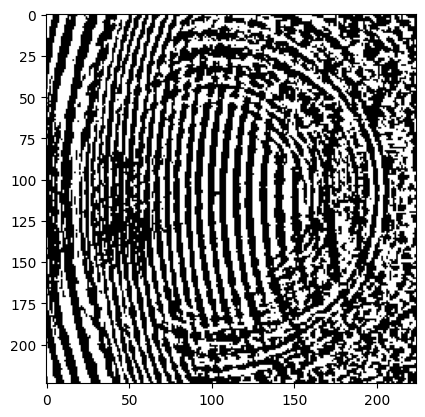

In [8]:
plt.imshow(nlm)
plt.show()

In [9]:
print(nlm.dtype)
print(nlmu.dtype)


float64
uint8


In [10]:
kernel_size = 2  # Adjust the kernel size as needed
kernel = np.ones((kernel_size, kernel_size), np.uint8)

# Perform opening operation
opening_result = cv2.morphologyEx(nlmu, cv2.MORPH_OPEN, kernel)

# Perform closing operation
closing_result = cv2.morphologyEx(opening_result, cv2.MORPH_CLOSE, kernel)


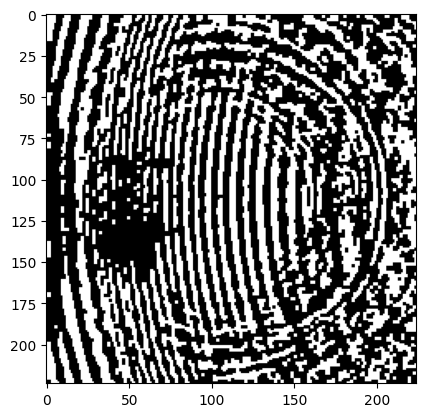

In [11]:
plt.imshow(closing_result)
plt.show()
